# Validation of Smoothing Parameter δ
This notebook validates the choice of δ by comparing E(x) for different δ values against a reference (N_a = 1e18 cm^-3, N_d = 1e16 cm^-3) using poisson_solver.py (PBL Level 3).

Using poisson_solver from: c:\Users\earme\OneDrive\Desktop\pn-junction-modeling\code\poisson_solver.py


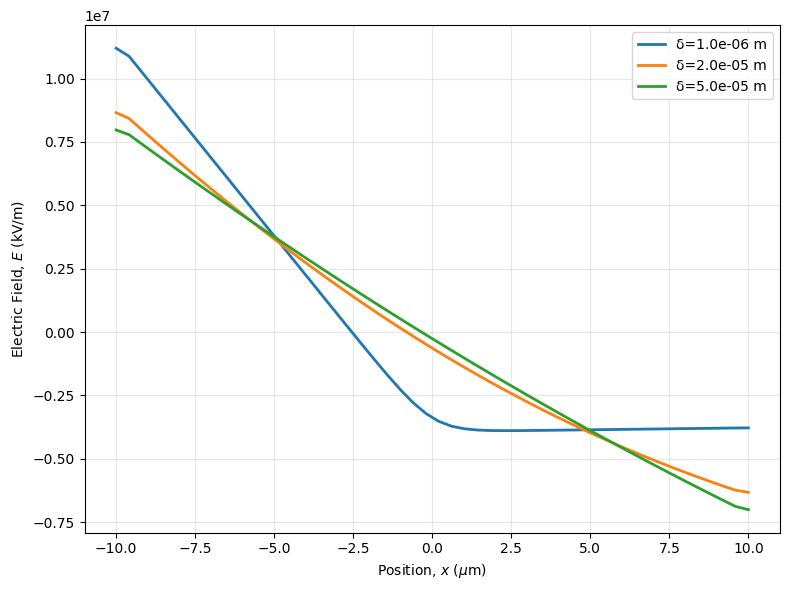

In [2]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
os.environ["PYTHONDONTWRITEBYTECODE"] = "1"
base_dir = os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), 'code'))
sys.path.append(base_dir)
from poisson_solver import poisson_solver
plots_dir = os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), 'plots'))
os.makedirs(plots_dir, exist_ok=True)
print(f"Using poisson_solver from: {os.path.join(base_dir, 'poisson_solver.py')}")

# Parameters
N_a = 1e18 * 1e6; N_d = 1e16 * 1e6
q = 1.6e-19; k = 1.38e-23; T = 300; N_i = 1.5e16
V_bi = k * T / q * np.log(N_a * N_d / N_i**2)
x = np.linspace(-1e-5, 1e-5, 50)
deltas = [1e-6, 2e-5, 5e-5]

plt.figure(figsize=(8, 6))
for delta in deltas:
    try:
        E, _ = poisson_solver(N_a, N_d, V_bi, x=x, delta=delta)
        plt.plot(x * 1e6, E / 1e3, label=f'δ={delta:.1e} m', linewidth=2)
    except Exception as e:
        print(f"Error for δ={delta:.1e}: {e}")
plt.xlabel('Position, $x$ ($\\mu$m)')
plt.ylabel('Electric Field, $E$ (kV/m)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(plots_dir, 'E_delta_validation.png'), dpi=300, bbox_inches='tight')
plt.show()